In [1]:
from scipy.ndimage import convolve
import numpy as np
from PIL import Image
from PIL import ImageOps

In [18]:
def vetorize_to_file(arr, name, path, mi = 50, ma = 10000):
    
    divisor = max(arr)
    with open(path + name + '.txt', 'w') as file:
        file.write('[')
        for i in range(len(arr)):
            if i == len(arr)-1:
                file.write(str((arr[i]/divisor)*(ma - mi) + mi ) + ']')
            else:
                file.write(str((arr[i]/divisor)*(ma - mi) + mi ) + ', ')

In [12]:
def resize_image(max_h, max_w, img):
    
    size = img.size
    amax = np.argmax(size)
    
    if amax == 0:
        scale = max_h/size[amax]
    else:
        scale = max_w/size[amax]
    
    new_size = (int(size[0]*scale), int(size[1]*scale))
    
    return img.resize(new_size)

In [13]:
# Padroes de configuração

PATH = 'exp1/'
IMG_NAME = 'img_padrao.png'
MAX_HEIGHT = 75
MAX_WIDTH = 75

# Kernels

kernel_edge_1 = np.array([np.array(
    [[1,  0, -1],
     [0,  0,  0],
     [-1, 0,  1]]) for i in range(3)])

kernel_edge_2 = np.array([np.array(
    [[0,  1, 0],
     [1, -4, 1],
     [0,  1, 0]]) for i in range(3)])

kernel_edge_3 = np.array([np.array(
    [[-1, -1, -1],
     [-1,  8, -1],
     [-1, -1, -1]]) for i in range(3)])

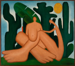

In [14]:
# Visualização da imagem

img = resize_image(MAX_HEIGHT, MAX_WIDTH, Image.open(PATH+IMG_NAME))
img

In [15]:
# Conversão aos formatos LA e HSV

imgLA = img.convert("LA")
imgHSV = img.convert("HSV")

In [16]:
# Convoluções

imgEDGE1 = Image.fromarray(convolve(np.asarray(imgLA), kernel_edge_1))
imgEDGE2 = Image.fromarray(convolve(np.asarray(imgLA), kernel_edge_2))
imgEDGE3 = Image.fromarray(convolve(np.asarray(imgLA), kernel_edge_3))

In [17]:
# Escrevendo nos arquivos

sufix_name = IMG_NAME.split('.')[0]

# Tonalidade ([H]SV)
mi, ma = 0, 88
file_name = sufix_name + '_tonalidade'
Image.fromarray(np.asarray(imgHSV)[:,:,0]).save(PATH + file_name + '.png') # save image
arr = np.asarray(imgHSV, dtype = np.float)[:,:,0].reshape(-1)
vetorize_to_file(arr, file_name, PATH, mi = mi, ma = ma)

# Saturação (H[S]V)
mi, ma = 0, 1
file_name = sufix_name + '_saturacao'
Image.fromarray(np.asarray(imgHSV)[:,:,1]).save(PATH + file_name + '.png') # save image
arr = np.asarray(imgHSV, dtype = np.float)[:,:,1].reshape(-1)
vetorize_to_file(arr, file_name, PATH, mi = mi, ma = ma)

# Brilho (HS[V])
mi, ma = 0, 1
file_name = sufix_name + '_brilho'
Image.fromarray(np.asarray(imgHSV)[:,:,2]).save(PATH + file_name + '.png') # save image
arr = np.asarray(imgHSV, dtype = np.float)[:,:,2].reshape(-1)
vetorize_to_file(arr, file_name, PATH, mi = mi, ma = ma)

# Preto e Branco
mi, ma = 0, 2
file_name = sufix_name + '_pb'
Image.fromarray(np.asarray(imgLA)[:,:,0]).save(PATH + file_name + '.png') # save image
arr = np.asarray(imgLA, dtype = np.float)[:,:, 0].reshape(-1)
vetorize_to_file(arr, file_name, PATH, mi = mi, ma = ma)

# Edge1
mi, ma = 0, 1
file_name = sufix_name + '_edge1'
Image.fromarray(np.asarray(imgEDGE1)[:,:,0]).save(PATH + file_name + '.png') # save image
arr = np.asarray(imgEDGE1, dtype = np.float)[:,:, 1].reshape(-1)
vetorize_to_file(arr, file_name, PATH, mi = mi, ma = ma)

# Edge2
mi, ma = 0, 1
file_name = sufix_name + '_edge2'
Image.fromarray(np.asarray(imgEDGE2)[:,:,0]).save(PATH + file_name + '.png') # save image
arr = np.asarray(imgEDGE1, dtype = np.float)[:,:, 1].reshape(-1)
vetorize_to_file(arr, file_name, PATH, mi = mi, ma = ma)

# Edge3
mi, ma = 0, 1
file_name = sufix_name + '_edge3'
Image.fromarray(np.asarray(imgEDGE3)[:,:,0]).save(PATH + file_name + '.png') # save image
arr = np.asarray(imgEDGE1, dtype = np.float)[:,:, 1].reshape(-1)
vetorize_to_file(arr, file_name, PATH, mi = mi, ma = ma)